In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# !pip install intel-openmp

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
64+64

In [ ]:
bs = 128

In [ ]:
path = "/content/drive/MyDrive/data"


In [ ]:
path

'/content/drive/MyDrive/data'

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [ ]:
data

ImageDataBunch;

Train: LabelList (8012 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Benign_keratosis-like_lesions,Benign_keratosis-like_lesions,Benign_keratosis-like_lesions,Benign_keratosis-like_lesions,Benign_keratosis-like_lesions
Path: /content/drive/MyDrive/data;

Valid: LabelList (2003 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Actinic_keratoses,Melanocytic_nevi,Melanocytic_nevi,Benign_keratosis-like_lesions,Melanocytic_nevi
Path: /content/drive/MyDrive/data;

Test: None

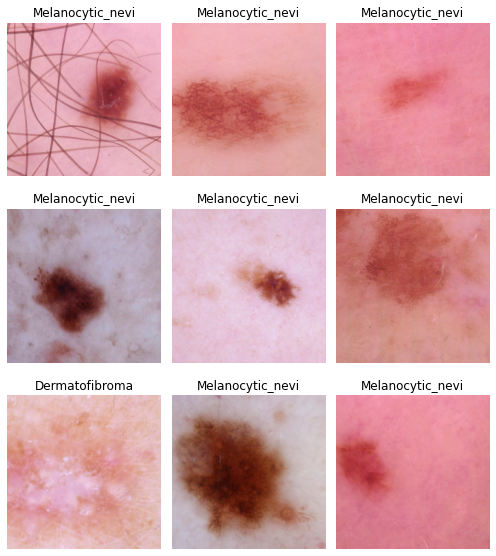

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))


In [ ]:
print(data.classes)
len(data.classes),data.c

['Actinic_keratoses', 'Basal_cell_carcinoma', 'Benign_keratosis-like_lesions', 'Dermatofibroma', 'Melanocytic_nevi', 'Melanoma', 'Vascular_lesions']


(7, 7)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.529022,0.872636,0.256116,14:11
1,0.845007,0.617037,0.210185,03:44
2,0.639449,0.535100,0.199201,03:44
3,0.545839,0.528108,0.189715,03:45


In [ ]:
learn.save('stage-1')

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


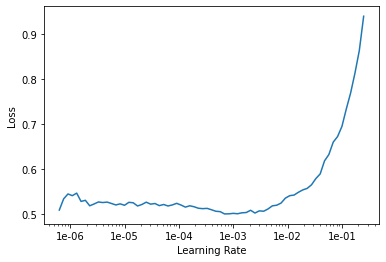

In [ ]:
learn.recorder.plot()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

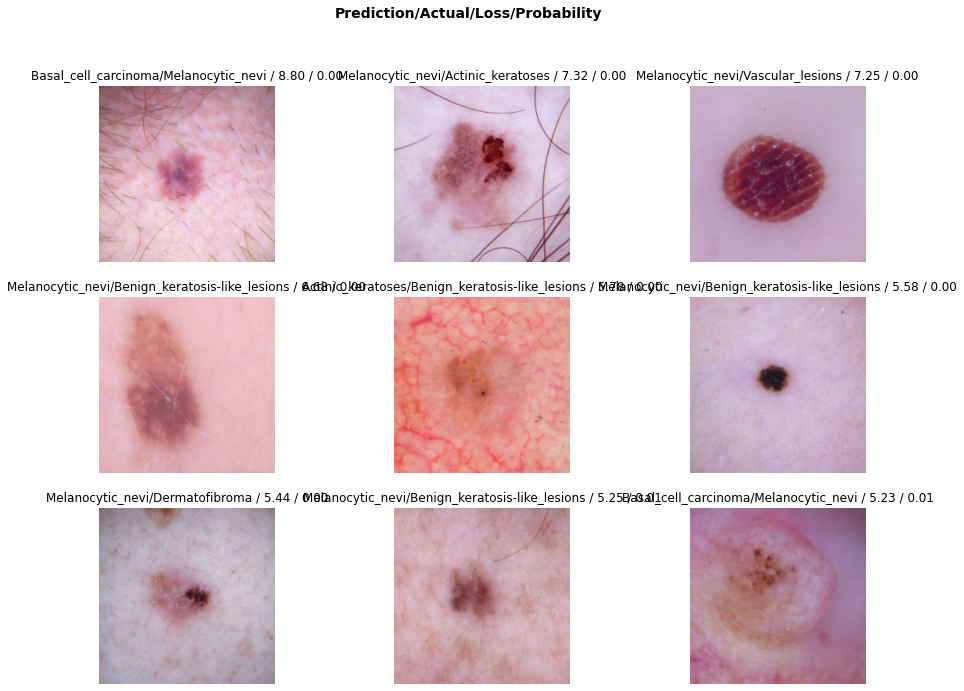

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=2)

[('Melanoma', 'Melanocytic_nevi', 79),
 ('Benign_keratosis-like_lesions', 'Melanocytic_nevi', 69),
 ('Benign_keratosis-like_lesions', 'Melanoma', 28),
 ('Melanocytic_nevi', 'Melanoma', 25),
 ('Melanoma', 'Benign_keratosis-like_lesions', 21),
 ('Basal_cell_carcinoma', 'Actinic_keratoses', 16),
 ('Melanocytic_nevi', 'Benign_keratosis-like_lesions', 15),
 ('Basal_cell_carcinoma', 'Melanocytic_nevi', 12),
 ('Melanoma', 'Actinic_keratoses', 12),
 ('Actinic_keratoses', 'Benign_keratosis-like_lesions', 11),
 ('Benign_keratosis-like_lesions', 'Actinic_keratoses', 11),
 ('Dermatofibroma', 'Melanocytic_nevi', 11),
 ('Melanocytic_nevi', 'Basal_cell_carcinoma', 10),
 ('Actinic_keratoses', 'Melanocytic_nevi', 8),
 ('Actinic_keratoses', 'Basal_cell_carcinoma', 6),
 ('Basal_cell_carcinoma', 'Melanoma', 5),
 ('Benign_keratosis-like_lesions', 'Basal_cell_carcinoma', 5),
 ('Basal_cell_carcinoma', 'Benign_keratosis-like_lesions', 4),
 ('Dermatofibroma', 'Actinic_keratoses', 4),
 ('Melanoma', 'Basal_cell_

In [ ]:
len(data.valid_ds)

2003

In [ ]:
#@title Default title text
learn.unfreeze()

In [2]:
#@title
learn.fit_one_cycle(6,max_lr=slice(1e-06,1e-02))

NameError: ignored

In [ ]:
#@title 

learn.lr_find()

In [ ]:
#@title 
learn.recorder.plot()

In [ ]:
#@title
learn.save('stage-revised')

In [ ]:
#@title
learn.fit_one_cycle(4,max_lr=slice(1e-06,1e-04))

In [ ]:
#@title
learn.lr_find()

In [ ]:
#@title
learn.recorder.plot()

In [ ]:
learn = cnn_learner(data, models.resnet50).load('stage-1')

In [ ]:
data1 = []
local_download_path="/content/drive/MyDrive/skin_test"
for filename in os.listdir(local_download_path):
    if filename.endswith("jpg"): 
        # Your code comes here such as 
        # print(filename)
        data1.append(filename)
type(data1)

list

In [ ]:
for i  in data1:
  print(i)

melanoma.jpg
derma.jpg
bcc.jpg
ak.jpg


In [ ]:
predictions=[]
for i in data1:
    img=f'/content/drive/MyDrive/skin_test/{i}'
    cat, tensor, probs = learn.predict(open_image(img))
    print(cat.__str__())

    
    predictions.append(cat.__str__())

Melanoma
Dermatofibroma
Basal_cell_carcinoma
Actinic_keratoses


In [ ]:
import pandas as pd 
  
# intialise data of lists. 
d = {'Filename':data1, 
        'Class':predictions} 
  
# Create DataFrame 
df = pd.DataFrame(d) 
  
# Print the output. 
df 

,Filename,Class
0,melanoma.jpg,Melanoma
1,derma.jpg,Dermatofibroma
2,bcc.jpg,Basal_cell_carcinoma
3,ak.jpg,Actinic_keratoses


In [ ]:
csv_name=8
df.to_csv(f"/content/drive/MyDrive/skin_results{csv_name}.csv",index=False)

In [ ]:
from google.colab import files
f=f'/content/drive/MyDrive/boat_type_classification/{csv_name}.csv'
files.download(f) 
